## KNearestNeighbors
*  Author: Sabari Murugan S
*  GitHub: https://github.com/sabarimurugans47
*  License: Educational use only. Please credit if reused.

In [ ]:
import pandas as pd,matplotlib.pyplot as plt
df=pd.DataFrame({
    'color':['Red','Yellow','Green','Red','Yellow'],
    'shape':['Round','Long','Round','Round','Round'],
    'size':['Small','Medium','Large','Medium','Small'],
    'fruit':['cherry','Banana','Watermelon','Apple','Lemon']
})

In [ ]:
df

,color,shape,size,fruit
0,Red,Round,Small,cherry
1,Yellow,Long,Medium,Banana
2,Green,Round,Large,Watermelon
3,Red,Round,Medium,Apple
4,Yellow,Round,Small,Lemon


## KNN Classifier

## If features are discrete , use hamming distance.Hamming distance works if x1 and x2 are same then it assigns 0 , if not it assigns 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [ ]:
df

,color,shape,size,fruit
0,1,1,2,4
1,2,0,1,1
2,0,1,0,3
3,1,1,1,0
4,2,1,2,2


In [ ]:
new_fruit=pd.DataFrame({
    'color':1,#Red color
    'shape':[0],#Long shape
    'size':[1]#Medium size
})
new_fruit

,color,shape,size
0,1,0,1


In [ ]:
sample1=(0+1+1)
sample2=(1+0+0)
sample3=(1+1+1)
sample4=(0+1+0)
sample5=(1+1+1)
df['rank']=[sample1,sample2,sample3,sample4,sample5]
df

,color,shape,size,fruit,rank
0,1,1,2,4,2
1,2,0,1,1,1
2,0,1,0,3,3
3,1,1,1,0,1
4,2,1,2,2,3


## Sample has minimum hamming distance , so new fruit belongs to banana

In [ ]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(df[['color','shape','size']],df['fruit'])
knn.predict(new_fruit)

array([1])

In [ ]:
predicted_prob=knn.predict_proba(new_fruit)
predicted_prob

array([[0., 1., 0., 0., 0.]])

In [ ]:
df

,color,shape,size,fruit,rank
0,1,1,2,4,2
1,2,0,1,1,1
2,0,1,0,3,3
3,1,1,1,0,1
4,2,1,2,2,3


## If features are continous , we use euclidean distance
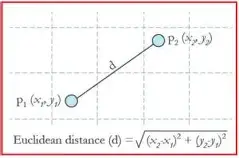

## KNN Regressor.In classification we take majority vote , but here we took average

In [ ]:
df2=pd.DataFrame({
    'x1':[2,4,6,8,10],
    'x2':[6,7,8,5,6],
    'x3':[1,2,3,4,5],
    'y':[50,65,80,90,95]
})
df2

,x1,x2,x3,y
0,2,6,1,50
1,4,7,2,65
2,6,8,3,80
3,8,5,4,90
4,10,6,5,95


In [ ]:
import numpy as np
new_instance=[5,7,2]
dist=np.sqrt((df2['x1']-new_instance[0])**2+(df2['x2']-new_instance[1])**2+(df2['x3']-new_instance[2])**2)
dist

,0
0,3.316625
1,1.000000
2,1.732051
3,4.123106
4,5.916080


## Sample 2 has minimum distance with new instance . So new sample belongs to 65.If we initialize n_neighbors=2 , it find minimum three distance and take average.

In [ ]:
knn=KNeighborsRegressor(n_neighbors=2,metric='euclidean')
knn.fit(df2[['x1','x2','x3']],df2['y'])
knn.predict([[5,7,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([72.5])

In [ ]:
(65+80)/2

72.5

## To find a optimal n_neighbors you can use elbow method

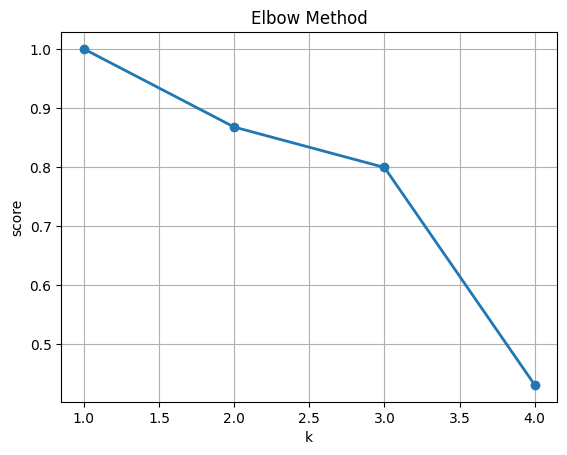

In [ ]:
scores = []
ks = range(1, 5)

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(df2[['x1', 'x2', 'x3']], df2['y'])
    scores.append(knn.score(df2[['x1', 'x2', 'x3']], df2['y']))

# Plotting elbow with line
plt.plot(ks, scores, 'o-', linewidth=2)
plt.xlabel('k')
plt.ylabel('score')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

## Line bends on k=2 , so it is an optimal k value



---

